In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


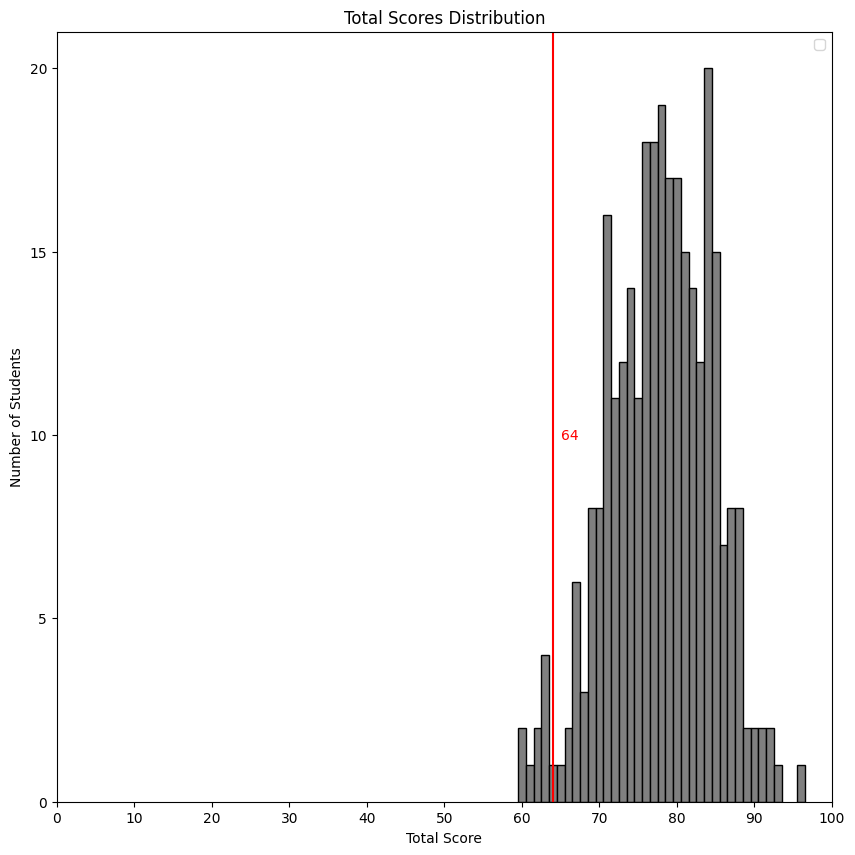

In [8]:
# Group No. 7
# 1. Benjarat Chooduang 6410450516
# 2. Kanyapat Thumthong 6410450346
# 3. Nopparuj Kunsongkhunakon 6410451687
# ---
##
####
group = 7
problem = 3 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"
####
######
# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"


# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

# หาค่าคะเเนนทั้งหมด Total
data['Total'] = data['HW1'] * 0.25 + data['HW2'] * 0.25 + data['Final'] * 0.5
data['Total'] = np.ceil(data['Total']).astype(int)

# หาค่าคะเเนน cutoff
mean = data['Total'].mean()
standardDeviation = data['Total'].std()
cutoff = int(np.floor(mean - 2 * standardDeviation))

# คำนวณเกรดจาก total score
data['Grade'] = ['S' if total >= cutoff else 'U' for total in data['Total']]

# เรียงตาม Total score จากมากไปน้อย
data = data.sort_values(by='Total', ascending=False)

# สร้างแผนภูมิแท่ง (histogram) แสดงการกระจายตัวของคะแนนรวม
score_counts = data['Total'].value_counts().sort_index()
x = score_counts.index
y = score_counts.values
plt.figure(figsize=(10, 10))
plt.bar(x, y, color='grey', width=1, edgecolor='black')
plt.xticks(range(0, 101, 10))
plt.xlabel('Total Score')
plt.ylabel('Number of Students')
y_max = ((max(y) + 4) // 5) * 5
plt.yticks(range(0, y_max+1, 5))
plt.title('Total Scores Distribution')

# วาดเส้น cutoff (แนวตั้ง สีแดง) เพื่อแสดงจุดตัดเกรด
plt.axvline(cutoff, color='red', linestyle='-')
plt.text(cutoff + 1, y_max/2, cutoff, rotation=360, color='red', va='center')

plt.legend()
plt.grid(False)

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()